# Speech Understanding 
# Lecture 5: Numpy and Matplotlib


### Mark Hasegawa-Johnson, KCGI

Last time, we learned that python modules (pre-made, free code) are one of the main reasons python is so popular.

One of the most useful modules are <a href="https://numpy.org/">numpy</a>, which implements linear algebra.  Most of the math in machine learning is linear algebra, so numpy has become very popular.

Another useful module is <a href="https://matplotlib.org/">matplotlib</a>, which creates scientific graphs and visualizations.

1. [numpy: linear algebra](#section1)
1. [numpy: array math](#section2)
1. [numpy: special arrays](#section3)
1. [matplotlib: Figure, add_subplot, and plot](#section4)
1. [matplotlib: stem](#section5)
1. [homework](#homework)

<a id="section1"></a>

<a id="section4"></a>

## 1 numpy: linear algebra

Chances are, you already have numpy installed.  Test it by running the following code block.  If it fails, close this window, go to a terminal, type `pip install numpy`, then come back.

In [1]:
import numpy


By convention, we usually import numpy using the following syntax.  This syntax makes `np` an alias for `numpy`:

In [2]:
import numpy as np

Numpy implements just one new data type, called an `array`.  You can convert a list into an array like this:

In [3]:
x = np.array([1,2,3,4,5])
print(x)
print('the type of',x,'is',type(x))

[1 2 3 4 5]
the type of [1 2 3 4 5] is <class 'numpy.ndarray'>


The main reason numpy is so popular is because of the huge variety of linear algebra functions it provides.  For example, suppose you have two vectors, $x$ and $y$, defined like this:

$$x=\left[\begin{array}{c}x_1\\x_2\\x_3\end{array}\right]=\left[\begin{array}{c}0.1\\-4\\0.25\end{array}\right],~~~y=\left[\begin{array}{c}y_1\\y_2\\y_3\end{array}\right]=\left[\begin{array}{c}3\\0.2\\5\end{array}\right]$$

Suppose you want to compute the dot product of these two vectors.  We write $z=x^Ty$, which means:

$$z=x^Ty=\sum_{i=1}^3 x_iy_i = 0.3-0.8+1.25=0.75$$

In numpy, we compute this dot product by defining the vectors $x$ and $y$, then calling the function `np.dot`:

In [4]:
x = np.array([0.1,-4,0.25])
y = np.array([3,0.2,5])
z = np.dot(x,y)
print(z)

0.75


Suppose we want to multiply a matrix with a vector, like this:

$$v=xW=[x_1,x_2,x_3]\left[\begin{array}{ccc}w_{1,1}&w_{1,2}&w_{1,3}\\w_{2,1}&w_{2,2}&w_{2,3}\\w_{3,1}&w_{3,2}&w_{3,3}\end{array}\right]$$

This notation means that we are setting the vector $v$ to have the following content:

$$v=\left[\sum_{i=1}^3x_iw_{i,1},~~~\sum_{i=1}^3x_iw_{i,2},~~~\sum_{i=1}^3x_iw_{i,3}\right]$$

For example, 

$$v=[0.1,-4,0.25]\left[\begin{array}{ccc}1&0&-1\\1&0&-1\\1&0&-1\end{array}\right]$$
$$=[0.1-4+0.25,~~0+0+0,~~-0.1+4-0.25]$$
$$=[-3.65,~~0,~~3.65]$$

In numpy, a matrix is just a 2-D array, like this:

In [5]:
listoflists = [[1,0,-1],[1,0,-1],[1,0,-1]]

print('the type of',listoflists,'is',type(listoflists),'\n')
print('the type of listoflists[0] is',type(listoflists[0]),'\n')
print('the type of listoflists[0][0] is',type(listoflists[0][0]),'\n')

W = np.array(listoflists)

print('the type of',W,'is',type(W))
print(W)

the type of [[1, 0, -1], [1, 0, -1], [1, 0, -1]] is <class 'list'> 

the type of listoflists[0] is <class 'list'> 

the type of listoflists[0][0] is <class 'int'> 

the type of [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] is <class 'numpy.ndarray'>
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


... and we can implement $v=xW$ by using the `np.matmul` (matrix multiplication) function:

In [6]:
v = np.matmul(x,W)
print(v)

[-3.65  0.    3.65]


Because they are so useful, the `np.dot` and `np.matmul` functions can be accessed using a shorthand symbol.  The `@` symbol, when used between two numpy arrays, means either `np.dot` or `np.matmul`, whichever is applicable:

In [7]:
x @ y

0.75

In [8]:
x @ W

array([-3.65,  0.  ,  3.65])

<a id="section2"></a>

## 2. numpy: array math

In order to make numpy as useful as possible, many of the functions that you can find in the <a href="https://docs.python.org/3/library/math.html">math</a> standard library are re-implemented in array form.  For example, suppose

$$x=[0,1,2,3]$$

Then 

$$x^2 = [0,1,4,9]$$

and

$$\cos(\pi x)=[\cos(0),~~\cos(\pi),~~\cos(2\pi),~~\cos(3\pi)]=[1,-1,1,-1]$$

These can be implemented in numpy like this:

In [9]:
x = np.array([0,1,2,3])
print('the square of',x,'is',x**2)
print('the cosine of pi times',x,'is',np.cos(np.pi*x))

print('the product of',x[:3],'and',y,'is',x[:3] * y)

print('pi is',np.pi)

the square of [0 1 2 3] is [0 1 4 9]
the cosine of pi times [0 1 2 3] is [ 1. -1.  1. -1.]
the product of [0 1 2] and [3.  0.2 5. ] is [ 0.   0.2 10. ]
pi is 3.141592653589793


<a id="section3"></a>

## 3. numpy: special arrays

Finally, there are a number of special "array constructors" that are worth knowing about:

* `np.zeros` = an array full of zeros
* `np.ones` = an array full of ones
* `np.eye` = an identity matrix
* `np.arange` = an integer range
* `np.linspace` = a set of numbers linearly spaced in some range

In [10]:
Z = np.zeros((3,3))
print(Z,"is a 3x3 matrix of all zeros\n")

O = np.ones((3,3))
print(O,"is a 3x3 matrix of all ones\n")

I = np.eye(3)
print(I,"is a 3x3 identity matrix\n")

R = np.arange(2,6)
print(R,"is the integer range from 2 to just before 6\n")
print('we could also compute this as',np.array([ n for n in range(2,6) ]),'\n')

L = np.linspace(0,1,6)
print(L,"contains 6 steps, linearly spaced between 0 through 1 inclusive\n")

print(np.linspace(2,5,4), 'contains 4 steps, linearly spaced between 2 and 5 inclusive')

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] is a 3x3 matrix of all zeros

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] is a 3x3 matrix of all ones

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] is a 3x3 identity matrix

[2 3 4 5] is the integer range from 2 to just before 6

we could also compute this as [2 3 4 5] 

[0.  0.2 0.4 0.6 0.8 1. ] contains 6 steps, linearly spaced between 0 through 1 inclusive

[2. 3. 4. 5.] contains 4 steps, linearly spaced between 2 and 5 inclusive


<a id="section4"></a>

## 4.  matplotlib: figure, subplots, plot

The other useful module we'll learn about today is <a href="https://matplotlib.org/">matplotlib</a>.  Matplotlib is a library for creating plots.  Test if you have it installed; if not, go to a terminal and type `pip install matplotlib`.

In [11]:
import matplotlib

Just like with numpy, there is a standard nickname for matplotlib.  We use `plt` as a nickname for <a href="https://matplotlib.org/stable/tutorials/introductory/pyplot.html">matplotlib.pyplot</a>, which is the most useful part of matplotlib:

In [14]:
import matplotlib.pyplot as plt

To use matplotlib, 

1. Create a figure, with specified `figsize`, using `plt.figure`
1. Create subplots, with specified number of rows and columns
1. Plot!

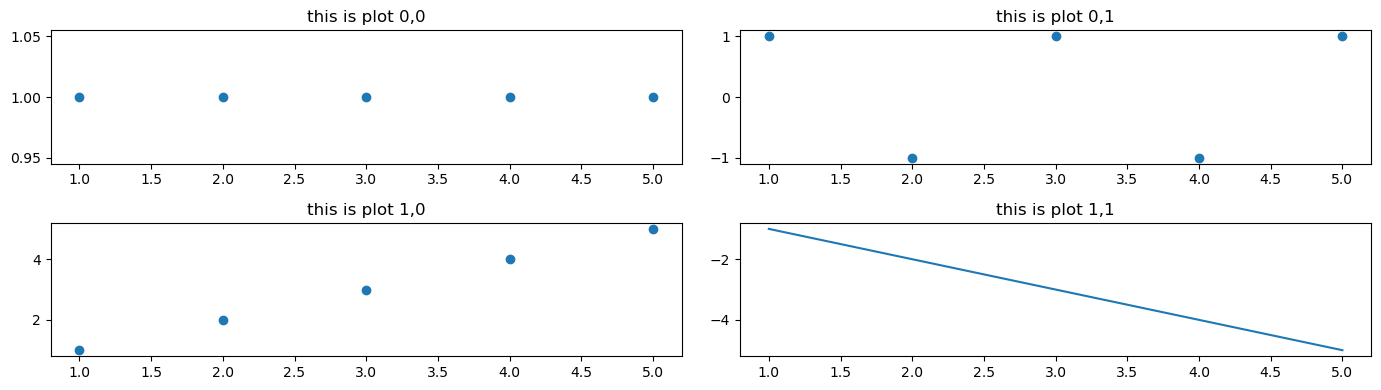

In [24]:
f = plt.figure(figsize=(14,4))
s = f.subplots(2,2)
s[0,0].plot([1,2,3,4,5],[1,1,1,1,1],'o')
s[0,0].set_title('this is plot 0,0')
s[0,1].plot([1,2,3,4,5],[1,-1,1,-1,1],'o')
s[0,1].set_title('this is plot 0,1')
s[1,0].plot([1,2,3,4,5],[1,2,3,4,5],'o')
s[1,0].set_title('this is plot 1,0')
s[1,1].plot([1,2,3,4,5],[-1,-2,-3,-4,-5])
s[1,1].set_title('this is plot 1,1')
f.tight_layout()

If you give the `plot` function 
* 2 arguments: it assumes that they are $(x,y)$ of one line
* 4 arguments: it assumes that they are $(x,y,x,y)$ of two lines

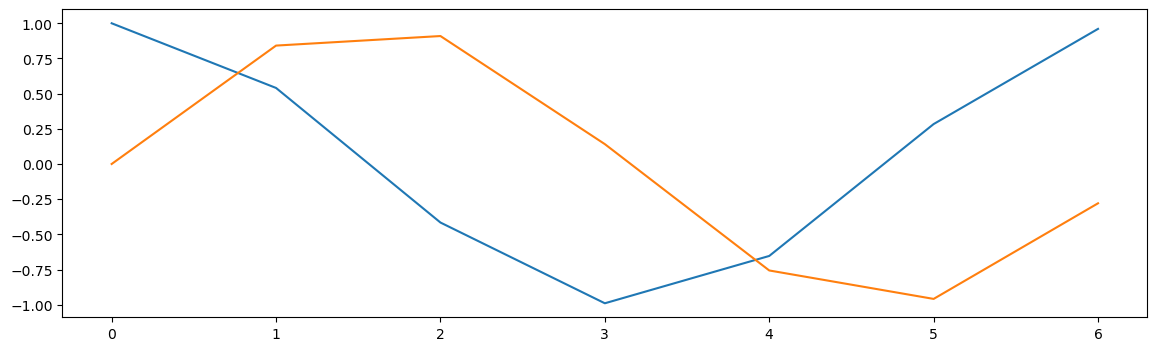

In [25]:
f = plt.figure(figsize=(14,4))
s = f.subplots(1,1)
s.plot([0,1,2,3,4,5,6],np.cos([0,1,2,3,4,5,6]),[0,1,2,3,4,5,6],np.sin([0,1,2,3,4,5,6]))

You can use the functions `set_title`, `set_xlabel`, `set_ylabel`, and `legend` to set the title, set the X-label, set the Y-label, and add a legend.  See <a href="https://matplotlib.org/stable/api/axes_api.html">Axes</a> to learn more about ways in which you can change the figure.

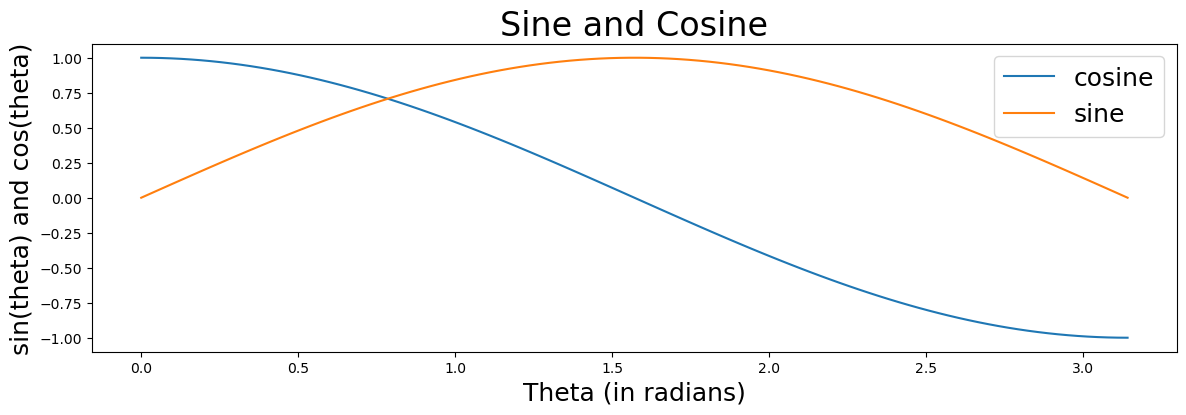

In [26]:
theta = np.linspace(0,np.pi,100)
cos = np.cos(theta)
sin = np.sin(theta)

f = plt.figure(figsize=(14,4))
s = f.subplots(1,1)
s.plot(theta,cos,theta,sin)
s.set_title('Sine and Cosine',fontsize=24)
s.set_xlabel('Theta (in radians)',fontsize=18)
s.set_ylabel('sin(theta) and cos(theta)',fontsize=18)
s.legend(['cosine','sine'],fontsize=18)

<a id="section5"></a>

## 5. matplotlib: scatter plots and stem plots


Matplotlib can create scatter plots and stem plots.
* Scatter plots are created by giving `plot` a third argument, specifying the kind of <a href="https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers">markers</a> to use
* Stem plots are created using the special command `stem`

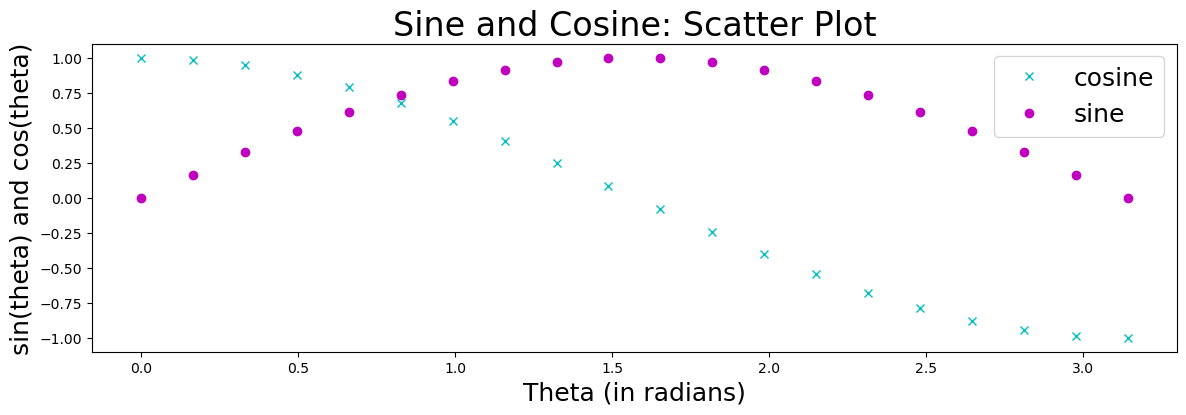

In [29]:
theta = np.linspace(0,np.pi,20)
cos = np.cos(theta)
sin = np.sin(theta)

f = plt.figure(figsize=(14,4))
s = f.subplots(1,1)
s.plot(theta,cos,'cx',theta,sin,'mo')
s.set_title('Sine and Cosine: Scatter Plot',fontsize=24)
s.set_xlabel('Theta (in radians)',fontsize=18)
s.set_ylabel('sin(theta) and cos(theta)',fontsize=18)
s.legend(['cosine','sine'],fontsize=18)

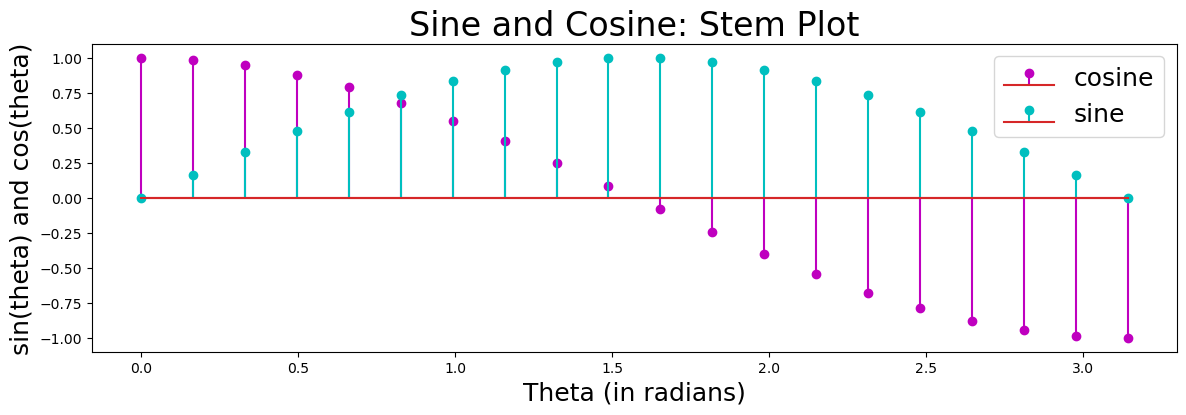

In [30]:
theta = np.linspace(0,np.pi,20)
cos = np.cos(theta)
sin = np.sin(theta)

f = plt.figure(figsize=(14,4))
s = f.subplots(1,1)
s.stem(theta,cos,'m')
s.stem(theta,sin,'c')
s.set_title('Sine and Cosine: Stem Plot',fontsize=24)
s.set_xlabel('Theta (in radians)',fontsize=18)
s.set_ylabel('sin(theta) and cos(theta)',fontsize=18)
s.legend(['cosine','sine'],fontsize=18)

<a id="homework"></a>

## Homework 5

Homework will be graded on Github.com.

In this directory, there is a file called `homework5.py`.  It contains 3 functions.  Complete those functions, finish the grading block at the end of this notebook, then commit and push your changed notebook to github.

### Homework Problem 5.1

In [31]:
import homework5, importlib
importlib.reload(homework5)
help(homework5.center_of_gravity)

Help on function center_of_gravity in module homework5:

center_of_gravity(x)
    Find the center of gravity of a vector, x.
    If x=[x0,x1,...,xn], then you should return
    c = ( 0*x0 + 1*x1 + 2*x2 + ... + n*xn ) / sum(x)
    where n = len(x)-1.

    Recommended method: use np.arange, np.dot, and np.sum.

    @param:
    x (array): a 1d numpy array

    @result:
    c (scalar): x's center of gravity



For example, the vector $x=[1,2,3,2,1]$ is centered around its third element ($x[2]$), so its center of gravity should be 

`c =  2.0`:

In [35]:
import homework5, importlib
importlib.reload(homework5)
print('c = ',homework5.center_of_gravity([1,3,3,3,1]))

c =  2.0


### Homework Problem 5.2

In [21]:
importlib.reload(homework5)
help(homework5.matched_identity)

Help on function matched_identity in module homework5:

matched_identity(x)
    Create an identity matrix that has the same number of rows as x has elements.
    Hint: use len(x), and use np.eye.
    
    @param:
    x (array): a 1d numpy array, of length N
    
    @result:
    I (array): a 2d numpy array: an NxN identity matrix



For example, since $x=[1,2,3,2,1]$ has 5 elements, $I$ should be a $5\times 5$ identity matrix,

`I = `
`[[1. 0. 0. 0. 0.]`
` [0. 1. 0. 0. 0.]`
` [0. 0. 1. 0. 0.]`
` [0. 0. 0. 1. 0.]`
` [0. 0. 0. 0. 1.]]`

In [38]:
import homework5, importlib
importlib.reload(homework5)

print('I = \n',homework5.matched_identity([1,2,3,2,1,1,1,1]))


I = 
 [[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


### Homework Problem 5.3

In [23]:
importlib.reload(homework5)
help(homework5.sine_and_cosine)

Help on function sine_and_cosine in module homework5:

sine_and_cosine(t_start, t_end, t_steps)
    Create a time axis, and compute its cosine and sine.
    Hint: use np.linspace, np.cos, and np.sin
    
    @param:
    t_start (scalar): the starting time
    t_end (scalar): the ending time
    t_steps (scalar): length of t, x, and y
    
    @result:
    t (array of length t_steps): time axis, t_start through t_end inclusive
    x (array of length t_steps): cos(t)
    y (array of length t_steps): sin(t)



For example, the following block should produce the same plot as block 73 above:

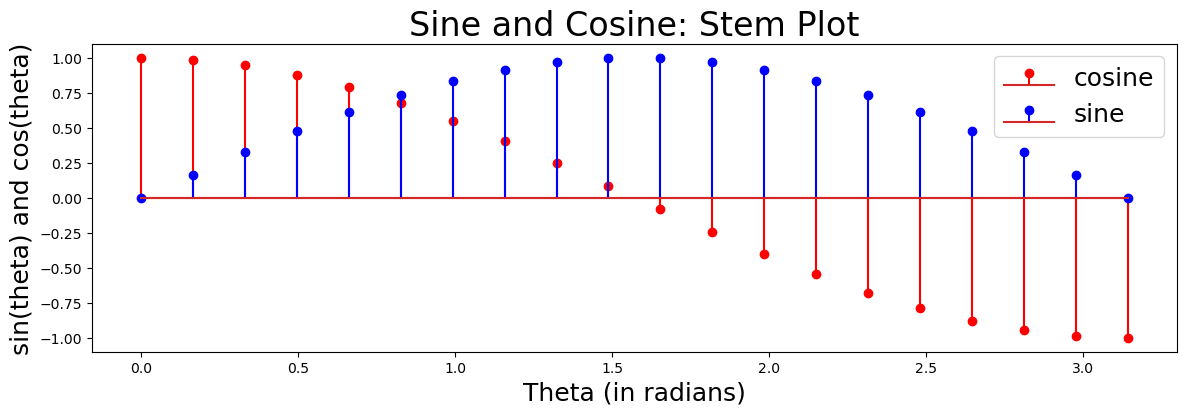

In [40]:
import homework5, importlib
importlib.reload(homework5)

(theta, cos, sin) = homework5.sine_and_cosine(0,np.pi,20)

f = plt.figure(figsize=(14,4))
s = f.subplots(1,1)
s.stem(theta,cos,'r')
s.stem(theta,sin,'b')
s.set_title('Sine and Cosine: Stem Plot',fontsize=24)
s.set_xlabel('Theta (in radians)',fontsize=18)
s.set_ylabel('sin(theta) and cos(theta)',fontsize=18)
s.legend(['cosine','sine'],fontsize=18)

### Receiving your grade

In order to receive a grade for your homework, you need to:

1. Run the following code block on your machine.  The result may list some errors, and then in the very last line, it will show a score.  That score (between 0% and 100%) is the grade you have earned so far.  If you want to earn a higher grade, please continue editing `homework3.py`, and then run this code block again.
1. When you are happy with your score (e.g., when it reaches 100%), choose `File` $\Rightarrow$ `Save and Checkpoint`.  Then use `GitHub Desktop` to commit and push your changes.
1. Make sure that the 100% shows on your github repo on github.com.  If it doesn't, you will not receive credit.

In [41]:
import importlib, grade
importlib.reload(grade)

...
----------------------------------------------------------------------
Ran 3 tests in 0.007s

OK
...
----------------------------------------------------------------------
Ran 3 tests in 0.005s

OK


3 successes out of 3 tests run
Score: 100%
3 successes out of 3 tests run
Score: 100%


<module 'grade' from '/Users/jhasegaw/kcgi/intro_speech_understanding/lec05/grade.py'>